In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
cancer = load_breast_cancer()

cancer.keys()
# data['target_names']
cancer['data'].shape
# cancer['feature_names'].shape
cancer['target']
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
X = cancer.data
y = cancer.target
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
#fitting and transforming data of pca and lda
principal_components_pca = pca.fit_transform(X_scaled)
lda = LDA(n_components=1)
principal_components_lda = lda.fit_transform(X_scaled, y)
variance_pca = pca.explained_variance_ratio_
print("Explained variance of pca: ",variance_pca)
variance_lda = lda.explained_variance_ratio_
print("Explained variance of lda: ", variance_lda)

Explained variance of pca:  [0.44272026 0.18971182]
Explained variance of lda:  [1.]


Text(-5, 12.5, 'Explained variance ratio: 0.4427')

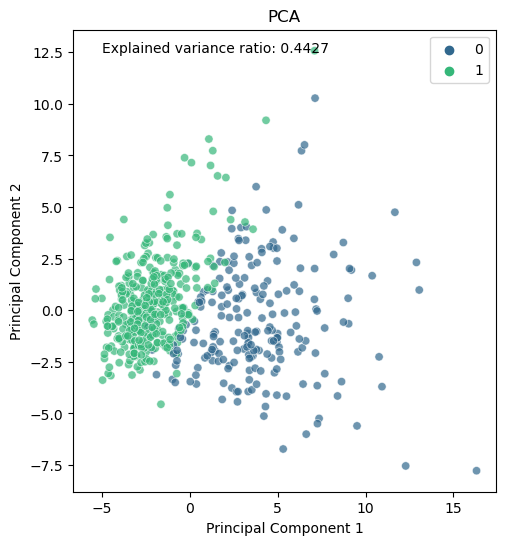

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('PCA')
sns.scatterplot(
    x=principal_components_pca[:, 0], 
    y=principal_components_pca[:, 1], 
    palette='viridis', 
    hue=y,
    alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.text(-5,12.5,f"Explained variance ratio: {variance_pca[0]:.4f}")

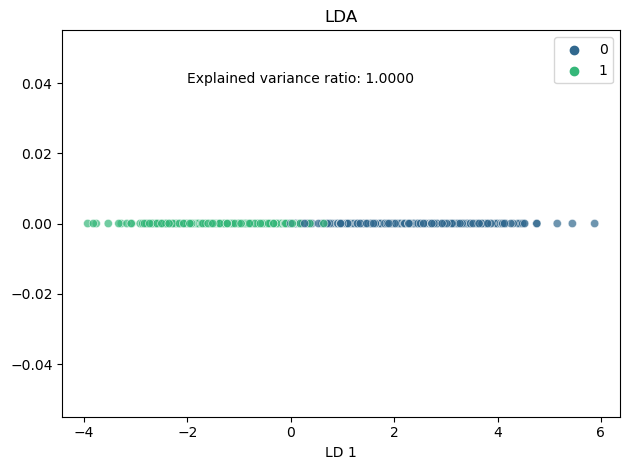

In [68]:
plt.title('LDA')
sns.scatterplot(
    x=principal_components_lda[:, 0], 
    y=np.zeros_like(principal_components_lda[:, 0]),
    hue=y, 
    palette='viridis', 
    alpha=0.7
)
plt.xlabel('LD 1')
plt.ylabel('')
plt.tight_layout()
plt.text(-2,0.04,f"Explained variance ratio: {variance_lda[0]:.4f}")
plt.show()